In [1]:
#normalisation

In [16]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df=pd.read_csv("datasets/wine_data.csv",usecols=[0,1,2])
df.head()

,1,14.23,1.71
0,1,13.20,1.78
1,1,13.16,2.36
2,1,14.37,1.95
3,1,13.24,2.59
4,1,14.20,1.76


In [18]:
df.columns=['Class label', 'Alcohol', 'Malic acid']
df['Class label'].unique()


array([1, 2, 3])

<AxesSubplot: ylabel='Density'>

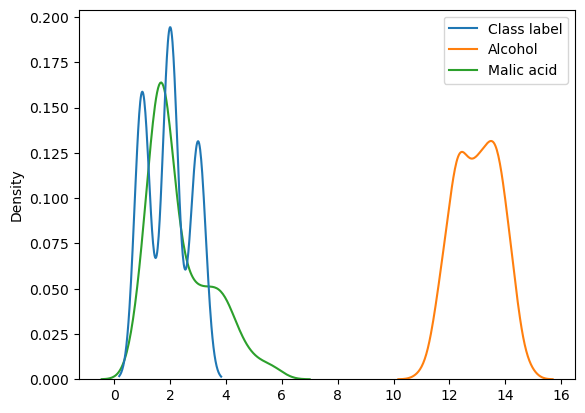

In [20]:
#ignore class label kde
sns.kdeplot(df)

<AxesSubplot: xlabel='Alcohol', ylabel='Malic acid'>

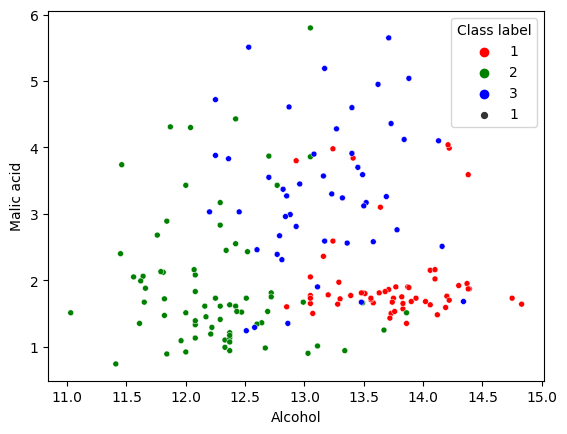

In [21]:
color_dict={1:'red',2:'green',3:'blue'}
sns.scatterplot(df,x="Alcohol",y="Malic acid",hue=df["Class label"],palette=color_dict,size=1)

In [32]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test= train_test_split(df.drop("Class label",axis=1),df["Class label"],
                                                  test_size=0.2,random_state=42 )
                                                                            


In [33]:
from sklearn.preprocessing import MinMaxScaler

mm_scaler=MinMaxScaler()
mm_scaler.fit(x_train) # computes min and max for later use

x_train_scaled= mm_scaler.transform(x_train)
x_test_scaled= mm_scaler.transform(x_test)

x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)

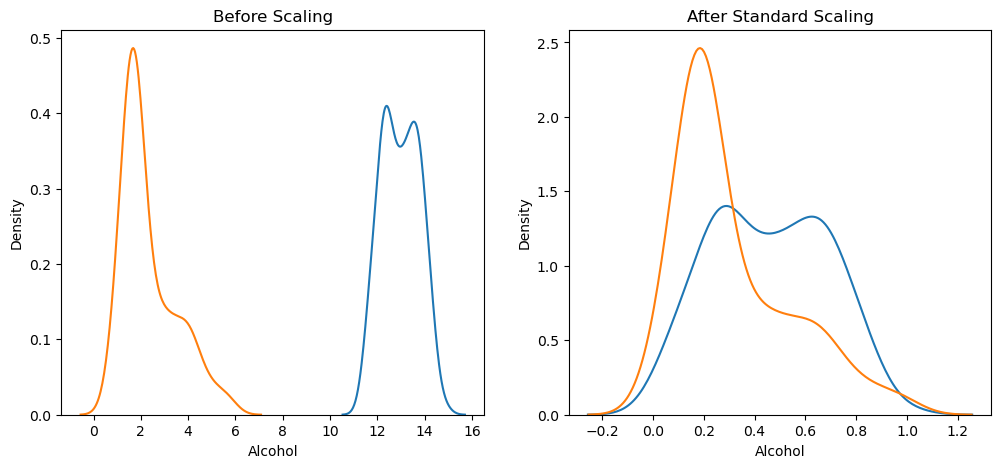

In [34]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(x_train['Alcohol'], ax=ax1)
sns.kdeplot(x_train['Malic acid'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(x_train_scaled['Alcohol'], ax=ax2)
sns.kdeplot(x_train_scaled['Malic acid'], ax=ax2)
plt.show()


In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr=LogisticRegression()
lr_scaled=LogisticRegression()
lr.fit(x_train,y_train)
lr_scaled.fit(x_train_scaled,y_train)

y_pred=lr.predict(x_test)
y_pred_scaled=lr_scaled.predict(x_test_scaled)

print("without normalising, accuracy ",accuracy_score(y_test,y_pred))
print("after normalising, accuracy ",accuracy_score(y_test,y_pred_scaled))




without normalising, accuracy  0.7777777777777778
after normalising, accuracy  0.7222222222222222


In [36]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt_scaled=DecisionTreeClassifier()

dt.fit(x_train,y_train)
dt_scaled.fit(x_train_scaled,y_train)

y_pred=dt.predict(x_test)
y_pred_scaled=dt_scaled.predict(x_test_scaled)

print("accuracy ",accuracy_score(y_test,y_pred))
print("accuracy after scaling ", accuracy_score(y_test,y_pred_scaled))

accuracy  0.75
accuracy after scaling  0.7777777777777778
